In [2]:
import json
import pandas as pd
from pathlib import Path
import statsmodels as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import tbats
from tbats import TBATS, BATS





In [3]:
OpenWeatherMap = pd.read_csv(Path('Materials/OpenWeatherMap/283bc5149218e9c8104cbc4d2369cd43.csv'))
OpenWeatherMap = OpenWeatherMap.drop(columns=['lat','lon','weather_icon'])
OpenWeatherMap.dt = OpenWeatherMap.dt.astype('datetime64[s]')

In [4]:
OpenWeatherMap.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description'],
      dtype='object')

In [5]:
import pandas as pd
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA

In [6]:
amsterdam = OpenWeatherMap[["dt","temp","temp_min","temp_max"]]
amsterdam['temp'] = amsterdam['temp']-273.15

<ipython-input-6-3fce9c1028be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amsterdam['temp'] = amsterdam['temp']-273.15


In [7]:
amsterdam = amsterdam.set_index('dt');

In [8]:
month_mean = amsterdam[['temp']].resample('M').mean()

In [9]:
amsterdam1 = amsterdam[amsterdam.index.hour == 1]
amsterdam1['temp']

len(amsterdam['temp'])




375375

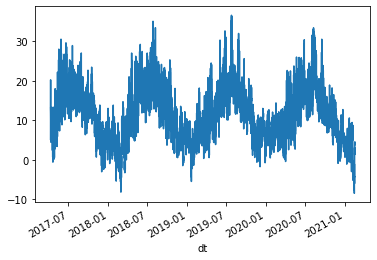

In [10]:
amsterdam['temp'].tail(24*365*4).plot()

In [11]:
train = amsterdam1.temp[1:1300]
test = amsterdam1.temp[1:len(amsterdam1)]

trainPerHour = amsterdam.temp[1:1300]
trainPerHour = amsterdam.temp[1:len(amsterdam)]


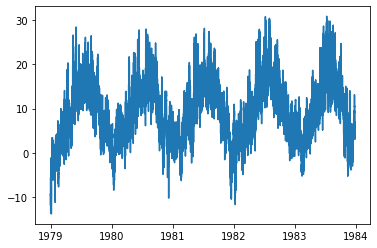

In [12]:
data = amsterdam.temp[1:365*5*24]
y_to_train = data.iloc[:(len(data)-365*24)]
y_to_test = data.iloc[(len(data)-365*24):] # last year for testing
plt.plot(data)


In [13]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=[24,365*24])
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365*24)






KeyboardInterrupt: 

In [1]:
y_forecast

NameError: name 'y_forecast' is not defined